In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# 指定URL
url = "https://global.rakuten.com/corp/investors/stock/bond.html"

# 指定USD与EUR汇率
USDJPY = 150.0
EURJPY = 160.0


# 通过requests返回url内容
response = requests.get(url)

# 解析url中的HTML文档
soup = BeautifulSoup(response.content, "html.parser")

In [2]:
# 获取Straight Bond Information
straight_bond = soup.find("section", class_="rf-section").find("table", class_="rf-table")
bond_colname = straight_bond.find_all("tr")[0]  #获取表格的列名称
straight_bond_rows = straight_bond.find_all("tr")[1:] 

# 确认第一行信息
print(straight_bond_rows[0])

<tr>
<th data-label="Bond Name" scope="row">USD-denominated Unsecured Bond due April 2029</th>
<td data-label="Issue Date (Payment Date)">April 10,<br/>2024</td>
<td data-label="Maturity Date">April 15,<br/>2029</td>
<td data-label="Term">5 Years</td>
<td data-label="Outstanding Amount">USD 2,000ｍ</td>
<td data-label="Coupon Rate">6.03932%*5</td>
<td data-label="Investment Unit">*1</td>
</tr>


In [3]:
# 获取Subordinated Bonds Information
subordinated_bond = soup.find_all("section", class_="rf-section")[1].find("table", class_="rf-table")
subordinated_bond_rows = subordinated_bond.find_all("tr")[1:] 

# 确认第一行信息
print(subordinated_bond_rows[0])

<tr>
<th data-label="Bond Name" scope="row">Undated Subordinated NC5 Fixed Rate Reset Notes</th>
<td data-label="Issue Date (Payment Date)">April 22,<br/>2021</td>
<td data-label="Maturity Date">No Maturity<sup>*1</sup></td>
<td data-label="Term">No Maturity</td>
<td data-label="Outstanding Amount">USD750m</td>
<td data-label="Coupon Rate">3.98746%*12</td>
<td data-label="Investment Unit">*4</td>
</tr>


In [4]:
# 定义存储债券信息的列表
straight_bond_info = []
subordinated_bond_info = []

In [5]:
# 从Straight Bond Information中获取信息并添加至列表中
for row in straight_bond_rows:
    bond_data = [data.get_text(strip=True) for data in row.find_all("th") + row.find_all("td")]
    print(bond_data)
    straight_bond_info.append(bond_data)

# 将list数据转化为numpy数据，以方便后续操作
straight_bond_np = np.array(straight_bond_info)

['USD-denominated Unsecured Bond due April 2029', 'April 10,2024', 'April 15,2029', '5 Years', 'USD 2,000ｍ', '6.03932%*5', '*1']
['USD-denominated Unsecured Bond due February 2027', 'February 6,2024', 'February 15,2027', '3 Years', 'USD 1,800ｍ', '7.21457%*4', '*1']
['22nd Unsecured Bond', 'February 10,2023', 'February 10,2025', '2 Years', 'JPY 250bn', '3.30%', 'JPY 0.5m']
['USD-denominated Unsecured Bond due November 2024', 'November 30,2022', 'November 30,2024', '2 Years', 'USD 350m', '5.30275%*3', '*1']
['21st Unsecured Bond', 'June 13,2022', 'June 13,2025', '3 Years', 'JPY 150bn', '0.72%', 'JPY 0.5m']
['20th Unsecured Bond', 'December 2,2021', 'December 2,2036', '15 Years', 'JPY 45bn', '1.50%', 'JPY 100m']
['19th Unsecured Bond', 'December 2,2021', 'December 2,2033', '12 Years', 'JPY 40bn', '1.30%', 'JPY 100m']
['18th Unsecured Bond', 'December 2,2021', 'December 2,2031', '10 Years', 'JPY 85bn', '1.05%', 'JPY 100m']
['17th Unsecured Bond', 'December 2,2021', 'December 1,2028', '7 Ye

In [6]:
# 从Subordinated Bonds Information中获取信息并添加至列表中
for row in subordinated_bond_rows:
    bond_data = [data.get_text(strip=True) for data in row.find_all("th") + row.find_all("td")]
    print(bond_data)
    subordinated_bond_info.append(bond_data)

# 将list数据转化为numpy数据，以方便后续操作
subordinated_bond_np = np.array(subordinated_bond_info)

['Undated Subordinated NC5 Fixed Rate Reset Notes', 'April 22,2021', 'No Maturity*1', 'No Maturity', 'USD750m', '3.98746%*12', '*4']
['Undated Subordinated NC6 Fixed Rate Reset Notes', 'April 22,2021', 'No Maturity*2', 'No Maturity', 'EUR1bn', '4.57890%*13', '*5']
['Undated Subordinated NC10 Fixed Rate Reset Notes', 'April 22,2021', 'No Maturity*3', 'No Maturity', 'USD1bn', '4.57247%*14', '*4']
['6th Subordinated Bond', 'November 4,2020', 'November 4,2060*6', '40 Years', 'JPY 50bn', '3.00%', 'JPY 100m']
['5th Subordinated Bond', 'November 4,2020', 'November 4,2057*7', '37 Years', 'JPY 20bn', '2.48%', 'JPY 100m']
['4th Subordinated Bond', 'November 4,2020', 'November 4,2055*8', '35 Years', 'JPY 50bn', '1.81%', 'JPY 100m']
['3rd Subordinated Bond', 'December 13,2018', 'December 13,2058*9', '40 Years', 'JPY 13bn', '3.00%', 'JPY 100m']
['2nd Subordinated Bond', 'December 13,2018', 'December 13,2055*10', '37 Years', 'JPY 26bn', '2.61%', 'JPY 100m']


In [7]:
# 将一般债券与劣后债上下结合
bond = np.concatenate((straight_bond_np,subordinated_bond_np))

In [8]:
##### 需要解决的问题
###### 0-如何设定永久劣后债（'Undated Subordinated NC5 Fixed Rate Reset Notes'）的到期日
###### 1-添加债券类型信息（有无到期日）
###### 2-如何去除附注（例如：'6.03932%*5' → '6.03932%'）
###### 3-如何提取货币信息
###### 4-如何统一金额单位

In [9]:
Maturity = []
BondType = []

for i in bond:
    #i[0]：债券名称
    #i[1]：债券发行日
    #i[2]：债券到期日    
    NonCall = ''.join(filter(str.isdigit, i[0]))                            # 提取债券名称中的数字信息（NonCall期间）

    if i[0].split(' ')[0] == 'Undated':                                     # 如果是永久劣后债券
        maturity = int(i[1].split('*')[0].split(',')[1])+int(NonCall)       # 提取发行日的年份信息 + NonCall期间
        Maturity.append(maturity)
        BondType.append('No Maturity')                                      # 将债券类别设置为'No Maturity'        
    
    else:
        maturity = i[2].split('*')[0].split(',')[1]                         # 如果不是永久劣后债券，直接提取到期日的年份信息
        Maturity.append(maturity)
        BondType.append('With Maturity')                                    # 将债券类别设置为'With Maturity'  


Maturity = np.array(Maturity)[:, np.newaxis]
bond_mtu  = np.concatenate((bond, Maturity),axis=1)
BondType = np.array(BondType)[:, np.newaxis]
bond_type  = np.concatenate((bond_mtu, BondType),axis=1)


In [10]:
# 提取利率信息
interest = []

#bond_type[:,5] = 利率信息

for i in bond_type[:,5]:
    interest.append(i.split('*')[0])

interest = np.array(interest)[:, np.newaxis]

bond_itrs = np.concatenate((bond_type, interest),axis=1)

In [11]:
# 提取货币信息
currency = []

#bond_type[:,5] = 货币信息

for i in bond_itrs[:,4]:
    if i.startswith('USD'):
        currency.append('USD')
    elif i.startswith('JPY'):
        currency.append('JPY')        
    elif i.startswith('EUR'):
        currency.append('EUR')  

currency = np.array(currency)[:, np.newaxis]

bond_crc = np.concatenate((bond_itrs, currency),axis=1)

In [12]:
# 统一金额单位

amt = []

# 提取和计算金额的函数
def calculate_amount(string):
    # 去除逗号和文本字符，只保留数字部分
    amount_str = ''.join(filter(str.isdigit, string))
    
    # 根据前三个字符和最后一个字符的组合确定乘数
    multiplier = 1
    if string.startswith('USD'):
        if string.endswith('m'):
            multiplier = USDJPY/100
        elif string.endswith('ｍ'):
            multiplier = USDJPY/100            
        elif string.endswith('bn'):
            multiplier = USDJPY*10
    elif string.startswith('JPY'):
        if string.endswith('m'):
            multiplier = 0.01
        elif string.endswith('bn'):
            multiplier = 10
    elif string.startswith('EUR'):
        if string.endswith('m'):
            multiplier = EURJPY/100
        elif string.endswith('bn'):
            multiplier = EURJPY*10

    # 计算最终结果
    amount = float(amount_str) * multiplier
    return amount


# 对每个字符串调用函数并打印结果
for string in bond_crc[:,4]:
    amount = calculate_amount(string)
    amt.append(amount)

amt = np.array(amt)[:, np.newaxis]

bond_amt = np.concatenate((bond_crc, amt),axis=1)


In [18]:
bond_amt

array([['USD-denominated Unsecured Bond due April 2029', 'April 10,2024',
        'April 15,2029', '5 Years', 'USD 2,000ｍ', '6.03932%*5', '*1',
        '2029', 'With Maturity', '6.03932%', 'USD', '3000.0'],
       ['USD-denominated Unsecured Bond due February 2027',
        'February 6,2024', 'February 15,2027', '3 Years', 'USD 1,800ｍ',
        '7.21457%*4', '*1', '2027', 'With Maturity', '7.21457%', 'USD',
        '2700.0'],
       ['22nd Unsecured Bond', 'February 10,2023', 'February 10,2025',
        '2 Years', 'JPY 250bn', '3.30%', 'JPY 0.5m', '2025',
        'With Maturity', '3.30%', 'JPY', '2500.0'],
       ['USD-denominated Unsecured Bond due November 2024',
        'November 30,2022', 'November 30,2024', '2 Years', 'USD 350m',
        '5.30275%*3', '*1', '2024', 'With Maturity', '5.30275%', 'USD',
        '525.0'],
       ['21st Unsecured Bond', 'June 13,2022', 'June 13,2025', '3 Years',
        'JPY 150bn', '0.72%', 'JPY 0.5m', '2025', 'With Maturity',
        '0.72%', 'JPY', 

In [13]:
bond_amt[0]

array(['USD-denominated Unsecured Bond due April 2029', 'April 10,2024',
       'April 15,2029', '5 Years', 'USD 2,000ｍ', '6.03932%*5', '*1',
       '2029', 'With Maturity', '6.03932%', 'USD', '3000.0'], dtype='<U48')

In [14]:
bond_hist =np.concatenate((bond_amt[:,0][:,np.newaxis],
                           bond_amt[:,1][:,np.newaxis],
                           bond_amt[:,-5][:,np.newaxis],
                           bond_amt[:,-4][:,np.newaxis],
                           bond_amt[:,-3][:,np.newaxis],
                           bond_amt[:,-1][:,np.newaxis]),
                           axis=1)


In [15]:
df = pd.DataFrame(bond_hist, columns=['Name','IssueDate','Maturity', 'Type', 'Interest', 'Amount(0.1bn jpy)'])

# 将日期列转换为日期时间类型，并按照日期排序
df['Maturity'] = pd.to_datetime(df['Maturity']).dt.year
df['Amount'] = df['Amount(0.1bn jpy)'].astype(float)
#df['MaturityYear'] = df['Maturity'].dt.year
df = df.sort_values(by='Maturity').reset_index(drop=True)

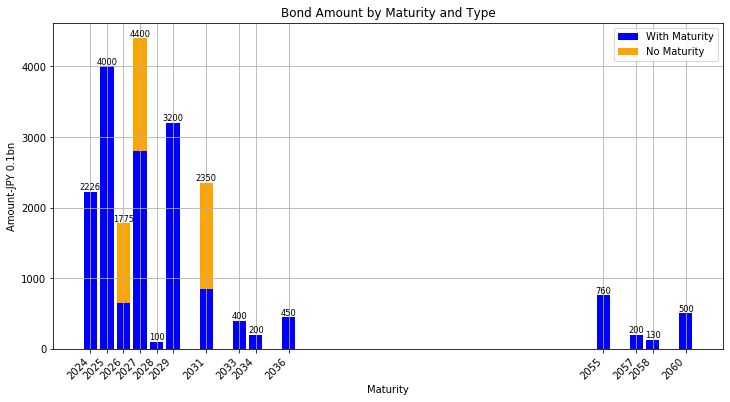

In [16]:
# 对数据进行分组，并计算每个组的总金额
grouped = df.groupby(['Maturity', 'Type'])['Amount'].sum().unstack().reset_index()
grouped = grouped.fillna(0)
grouped['total'] = grouped['With Maturity']+grouped['No Maturity']

# 绘制柱状图
plt.figure(figsize=(12, 6))

plt.bar(grouped['Maturity'], grouped['With Maturity'], color='blue', label='With Maturity')
plt.bar(grouped['Maturity'], grouped['No Maturity'], color='orange', label='No Maturity',bottom=grouped['With Maturity'])



# 旋转 x 轴标签
plt.xticks(grouped['Maturity'],rotation=45, ha='right')



# 显示网格线
plt.grid(True)

# 添加标签和标题
plt.xlabel('Maturity')
plt.ylabel('Amount-JPY 0.1bn')
plt.title('Bond Amount by Maturity and Type')
plt.legend(loc='upper right')

# 在每个柱状图上方添加数字标签
for i in range(len(grouped)):
    plt.text(grouped['Maturity'].iloc[i], grouped['total'].iloc[i], str(int(grouped['total'].iloc[i])), ha='center', va='bottom',size='small')


plt.show()

In [17]:
df

,Name,IssueDate,Maturity,Type,Interest,Amount(0.1bn jpy),Amount
0,11th Unsecured Bond,"June 25,2019",2024,With Maturity,0.25%,100.0,100.0
1,USD-denominated Unsecured Bond due November 2024,"November 30,2022",2024,With Maturity,5.30275%,525.0,525.0
2,USD-denominated Unsecured Bond due November 2024,"November 27,2019",2024,With Maturity,1.62730%,651.0,651.0
3,15th Unsecured Bond,"December 2,2021",2024,With Maturity,0.50％,750.0,750.0
4,8th Unsecured Bond,"June 6,2017",2024,With Maturity,0.32％,200.0,200.0
5,22nd Unsecured Bond,"February 10,2023",2025,With Maturity,3.30%,2500.0,2500.0
6,21st Unsecured Bond,"June 13,2022",2025,With Maturity,0.72%,1500.0,1500.0
7,16th Unsecured Bond,"December 2,2021",2026,With Maturity,0.60%,450.0,450.0
8,12th Unsecured Bond,"June 25,2019",2026,With Maturity,0.35%,200.0,200.0
9,Undated Subordinated NC5 Fixed Rate Reset Notes,"April 22,2021",2026,No Maturity,3.98746%,1125.0,1125.0
